# CrossFit 2020 Open - Exploratory Analysis

Main idea:

Analyze data from the 2020 open crossfit competition. Dataset obtained from kaggle.

## Import libraries

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Import data from '2020_OPENS_ATHLETES'

In [3]:
DF_Open2020A = pd.read_csv('2020_opens_athletes.csv', low_memory= False) # Import data from csv file

## General look into data from Athletes 

In [5]:
DF_Open2020A.head(5).transpose() # Visualize table

,0,1,2,3,4
competitorid,9184,12348,288661,37629,50423
competitorname,Janet Black,Karen McCadam,Christine Tensley,Heather Wood,Jennifer Dieter
firstname,Janet,Karen,Christine,Heather,Jennifer
lastname,Black,McCadam,Tensley,Wood,Dieter
postcompstatus,NaN,NaN,NaN,NaN,NaN
gender,F,F,F,F,F
profilepics3key,2886e-P9184_12-184.jpg,74335-P12348_6-184.jpg,cb7b3-P288661_1-184.jpg,7b3f4-P37629_3-184.jpg,5ceb5-P50423_10-184.jpg
countryoforigincode,US,US,US,CA,US
countryoforiginname,United States,United States,United States,Canada,United States
divisionid,4,4,4,4,4


In [7]:
DF_Open2020A.shape # Shape of DataFrame --> Rows,Columns

(393535, 19)

In [8]:
DF_Open2020A.info() #DataFrame info data type and non-null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393535 entries, 0 to 393534
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   competitorid         393535 non-null  int64  
 1   competitorname       393535 non-null  object 
 2   firstname            393535 non-null  object 
 3   lastname             393535 non-null  object 
 4   postcompstatus       313 non-null     object 
 5   gender               393535 non-null  object 
 6   profilepics3key      393535 non-null  object 
 7   countryoforigincode  393295 non-null  object 
 8   countryoforiginname  393535 non-null  object 
 9   divisionid           393535 non-null  int64  
 10  affiliateid          393535 non-null  int64  
 11  affiliatename        371541 non-null  object 
 12  age                  393535 non-null  int64  
 13  height               212062 non-null  float64
 14  weight               221542 non-null  float64
 15  overallrank      

## Check for competitors duplicated 

In [10]:
DF_Open2020A['competitorid'].duplicated().value_counts() # Number of duplicated competitor id´s

False    238829
True     154706
Name: competitorid, dtype: int64

154706 competitor id´s duplicated.

In [12]:
DF_Open2020A[DF_Open2020A['competitorid'].duplicated()].head(5).transpose() # Check for duplicated competitor 

,7054,7055,7056,7057,7058
competitorid,827503,502436,1343059,1115728,1010542
competitorname,Marsha Gillespie,Brandy Lynn Stewart,Susanne Stueber,Lorraine Guerra,Amanda Kaye
firstname,Marsha,Brandy Lynn,Susanne,Lorraine,Amanda
lastname,Gillespie,Stewart,Stueber,Guerra,Kaye
postcompstatus,NaN,NaN,NaN,NaN,NaN
gender,F,F,F,F,F
profilepics3key,85a1f-P827503_1-184.jpg,d6ba2-P502436_3-184.jpg,pukie.png,pukie.png,0a39d-P1010542_1-184.jpg
countryoforigincode,CA,US,DE,US,US
countryoforiginname,Canada,United States,Germany,United States,United States
divisionid,4,4,4,4,4


In [8]:
DF_Open2020A[DF_Open2020A['competitorname'] == 'Marsha Gillespie'] # Check for duplicated competitors 

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
3521,827503,Marsha Gillespie,Marsha,Gillespie,NaN,F,85a1f-P827503_1-184.jpg,CA,Canada,4,7328,CrossFit Pound,49,NaN,NaN,3522,18245,0,Women (45-49)
7054,827503,Marsha Gillespie,Marsha,Gillespie,NaN,F,85a1f-P827503_1-184.jpg,CA,Canada,4,7328,CrossFit Pound,49,NaN,NaN,1,20,1,Women (45-49)
141217,827503,Marsha Gillespie,Marsha,Gillespie,NaN,F,85a1f-P827503_1-184.jpg,CA,Canada,4,7328,CrossFit Pound,49,NaN,NaN,54489,271737,0,Women
180891,827503,Marsha Gillespie,Marsha,Gillespie,NaN,F,85a1f-P827503_1-184.jpg,CA,Canada,4,7328,CrossFit Pound,49,NaN,NaN,6,249,1,Women


The table shows one competitor showing up in diferetent divisions.

## Make new DF´s only in the men or women division that are in the professional division sorted by overallrank

In [13]:
DF_MenRx = DF_Open2020A[(DF_Open2020A['division'] == 'Men') & (DF_Open2020A['is_scaled'] == 0) & (DF_Open2020A['divisionid'] == 1)].sort_values(by = ['overallrank'])

In [14]:
DF_WomenRx = DF_Open2020A[(DF_Open2020A['division'] == 'Women') & (DF_Open2020A['is_scaled'] == 0) & (DF_Open2020A['divisionid'] == 2)].sort_values(by = ['overallrank'])

## Analysis of men division

In [16]:
DF_MenRx.head(5).transpose() # Show DF for men in Rx division 

,198613,198614,198615,198616,198617
competitorid,158264,153604,514502,81616,469656
competitorname,Patrick Vellner,Mathew Fraser,Lefteris Theofanidis,Björgvin Karl Guðmundsson,Jeffrey Adler
firstname,Patrick,Mathew,Lefteris,Björgvin Karl,Jeffrey
lastname,Vellner,Fraser,Theofanidis,Guðmundsson,Adler
postcompstatus,accepted,accepted,accepted,accepted,accepted
gender,M,M,M,M,M
profilepics3key,d471c-P158264_7-184.jpg,9e218-P153604_4-184.jpg,931eb-P514502_2-184.jpg,4c5dc-P81616_4-184.jpg,e480e-P469656_1-184.jpg
countryoforigincode,CA,US,GR,IS,CA
countryoforiginname,Canada,United States,Greece,Iceland,Canada
divisionid,1,1,1,1,1


In [17]:
DF_MenRx.info() # General info about data in DF_MenRx DF

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68836 entries, 198613 to 332484
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   competitorid         68836 non-null  int64  
 1   competitorname       68836 non-null  object 
 2   firstname            68836 non-null  object 
 3   lastname             68836 non-null  object 
 4   postcompstatus       134 non-null    object 
 5   gender               68836 non-null  object 
 6   profilepics3key      68836 non-null  object 
 7   countryoforigincode  68792 non-null  object 
 8   countryoforiginname  68836 non-null  object 
 9   divisionid           68836 non-null  int64  
 10  affiliateid          68836 non-null  int64  
 11  affiliatename        63557 non-null  object 
 12  age                  68836 non-null  int64  
 13  height               40852 non-null  float64
 14  weight               43229 non-null  float64
 15  overallrank          68836 non

Some data missing on height and weight. (Competitor personal data)

## Men age

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Frequency'>

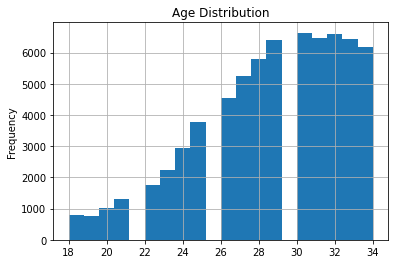

In [19]:
DF_MenRx['age'].plot(kind = 'hist' , bins = 20, title = 'Age Distribution',xlabel = 'Age', ylabel = 'Frequency', grid = True)

Distribuition of Men´s age

<AxesSubplot:title={'center':'Age BoxPlot'}, ylabel='Age'>

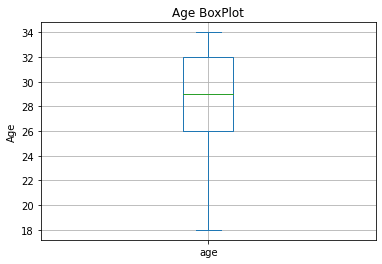

In [21]:
DF_MenRx['age'].plot(kind = 'box', grid = True, title = 'Age BoxPlot', ylabel = 'Age')

Box plot showing the min, max ,quartiles and mean.

## Men country distribuition

<AxesSubplot:ylabel='Country'>

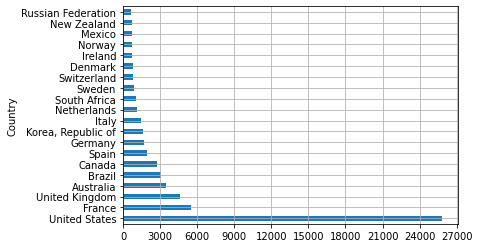

In [22]:
DF_MenRx['countryoforiginname'].value_counts()[0:20].plot(kind = 'barh', ylabel = 'Country', grid = True, xticks = np.arange(0,30000,3000)) # Check top 10 countries in Games

Ruge amount of competitors from US when compared to another countries.

## Men height analysis

<AxesSubplot:xlabel='competitorid', ylabel='height'>

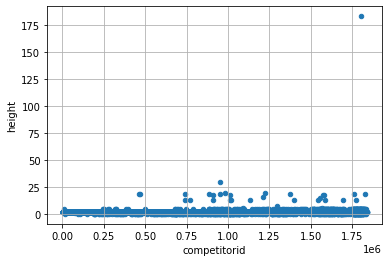

In [23]:
DF_MenRx.plot.scatter(x = 'competitorid', y = 'height', grid = True)

Some outliers.

**Restrict range of height to a more real spectrum.**

In [19]:
DF_MenRx[(DF_MenRx['height'] > 1.4) & ((DF_MenRx['height'] < 2.3))].shape

(40303, 19)

Lost of feel data points through this gross filter.

<AxesSubplot:ylabel='Height'>

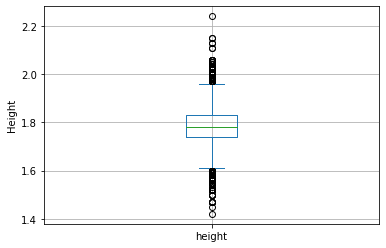

In [26]:
DF_MenRx[(DF_MenRx['height'] > 1.4) & ((DF_MenRx['height'] < 2.3))]['height'].plot(kind = 'box', grid = True, ylabel = 'Height')

## Men weight analysis

<AxesSubplot:xlabel='competitorid', ylabel='weight'>

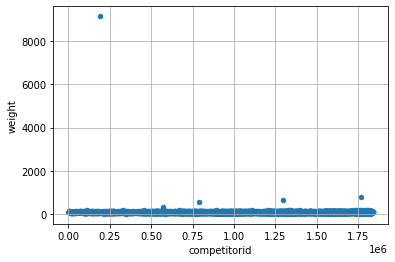

In [27]:
DF_MenRx.plot.scatter(x = 'competitorid', y = 'weight', grid = True)

Some outliers

**Restrict range of weight to a more real spectrum**

In [28]:
DF_MenRx[(DF_MenRx['weight'] < 120) & (DF_MenRx['weight'] > 50)].shape

(42565, 19)

<AxesSubplot:>

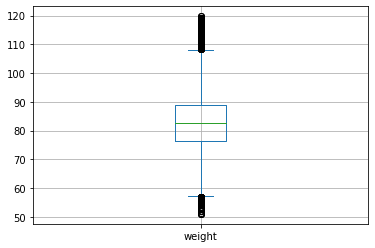

In [29]:
DF_MenRx[(DF_MenRx['weight'] < 120) & (DF_MenRx['weight'] > 50)]['weight'].plot(kind = 'box', grid = True)

## Import data from '2020_opens_scores.csv'

Dataset of atlhetes score

In [30]:
DF_OpenS = pd.read_csv('2020_opens_scores.csv')

### Check data 

In [31]:
DF_OpenS.head(5).transpose()

,0,1,2,3,4
affiliate,CrossFit Sunninghill,CrossFit Sunninghill,CrossFit Sunninghill,CrossFit Sunninghill,CrossFit Sunninghill
breakdown,10 rounds,27 rounds +\n3 thrusters\n,165 reps,240 reps,240 reps
competitorid,120333,120333,120333,120333,120333
division,Men (35-39),Men (35-39),Men (35-39),Men (35-39),Men (35-39)
is_scaled,0,0,0,0,0
judge,Richard Smith,Richard Smith,Richard Smith,Richard Smith,Richard Smith
ordinal,1,2,3,4,5
rank,12,2,9,1,1
scaled,0,0,0,0,0
score,11800316,1009210000,1001650034,1002400162,1002400562


## Merge DF_MenRx and DF_OpenS

In [32]:
DF_MenScore = pd.merge(DF_MenRx[['competitorid','competitorname','gender','divisionid','age','height','weight','overallrank']], DF_OpenS, on = 'competitorid')

In [33]:
DF_MenScore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372150 entries, 0 to 372149
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   competitorid     372150 non-null  int64  
 1   competitorname   372150 non-null  object 
 2   gender           372150 non-null  object 
 3   divisionid       372150 non-null  int64  
 4   age              372150 non-null  int64  
 5   height           214765 non-null  float64
 6   weight           226935 non-null  float64
 7   overallrank      372150 non-null  int64  
 8   affiliate        285307 non-null  object 
 9   breakdown        302831 non-null  object 
 10  division         372150 non-null  object 
 11  is_scaled        372150 non-null  int64  
 12  judge            285296 non-null  object 
 13  ordinal          372150 non-null  int64  
 14  rank             372150 non-null  int64  
 15  scaled           372150 non-null  int64  
 16  score            372150 non-null  int6

### Event 1 Analysis

10 rounds for time of:

8 ground-to-overheads  @95 lb. 

10 bar-facing burpees

Time cap: 15 minutes

In [35]:
Event1 = DF_MenScore[(DF_MenScore['ordinal'] == 1) & (DF_MenScore['scaled'] == 0)] # Filter merged DF data of event 1 and not scaled competitors

In [37]:
Event1.sort_values(by = ['rank']).head().transpose()

,10,15,50,195,405
competitorid,514502,81616,173837,6122,93473
competitorname,Lefteris Theofanidis,Björgvin Karl Guðmundsson,Jonne Koski,Christian Lucero,Josh Miller
gender,M,M,M,M,M
divisionid,1,1,1,1,1
age,30,27,25,27,31
height,1.71,1.78,1.71,1.75,1.75
weight,81.0,83.91,83.91,86.64,86.18
overallrank,3,4,11,40,83
affiliate,NaN,CrossFit Reykjavík,CrossFit Kreis 9,CrossFit Costa Mesa,CrossFit Crash
breakdown,10 rounds,10 rounds,10 rounds,10 rounds,10 rounds


<AxesSubplot:xlabel='rank', ylabel='time'>

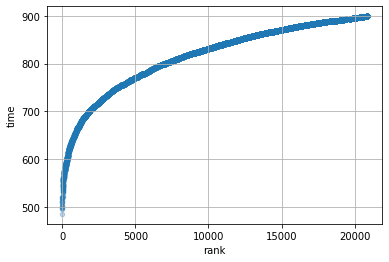

In [47]:
Event1[Event1['time'] < 15*60].plot.scatter(x = 'rank', y = 'time',grid = True , alpha = 0.3) # Results of competitors who finished in the time cap

Logaritimal distribuition of results

In [48]:
def get_reps_event1(Breakdown): #Function to get number of reps for each competitor
    Reps= 0
    for Bk in Breakdown.strip().split('\n'):
        if 'rounds' in Bk:
            NRounds = int(Bk.split(' ')[0])
            Reps += NRounds*18
        else:
            Rep = int(Bk.split(' ')[0])
            Reps += Rep
    
    return Reps

In [49]:
Event1['reps_fun'] = Event1['breakdown'].dropna().apply(get_reps_event1) # Apply to DF

<AxesSubplot:xlabel='rank', ylabel='reps_fun'>

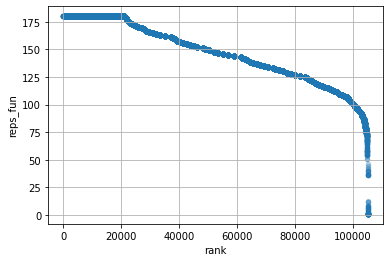

In [50]:
Event1.plot.scatter(x = 'rank', y = 'reps_fun',grid = True , alpha = 0.3, cmap = 'viridis')

<AxesSubplot:ylabel='age'>

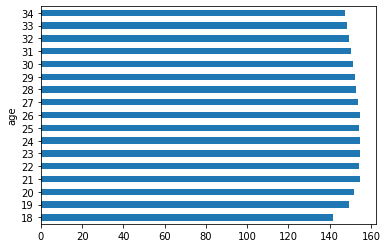

In [55]:
Event1[['age','reps_fun']].groupby(by = 'age').mean().plot(kind = 'barh', legend = False)

In [431]:
Event1['reps_fun'].describe()

count    55865.000000
mean       151.509335
std         25.926915
min          1.000000
25%        134.000000
50%        154.000000
75%        180.000000
max        180.000000
Name: reps_fun, dtype: float64

### Event 2 Analysis

Complete as many rounds as possible in 20 minutes of:

4 dumbbell thrusters

6 toes-to-bars

24 double-unders

50-lb. dumbbells

In [58]:
Event2 = DF_MenScore[(DF_MenScore['ordinal'] == 2) & (DF_MenScore['scaled'] == 0)] 

In [60]:
Event2.sort_values(by = ['rank']).head(3).transpose()

,1311,2131,11
competitorid,18543,485647,514502
competitorname,Frederik Aegidius,Derek Saltou,Lefteris Theofanidis
gender,M,M,M
divisionid,1,1,1
age,33,31,30
height,1.74,1.7,1.71
weight,84.0,77.11,81.0
overallrank,275,455,3
affiliate,CrossFit Reykjavík,CrossFit Chiron,NaN
breakdown,30 rounds +\n4 thrusters\n6 toes-to-bars\n,30 rounds +\n4 thrusters\n4 toes-to-bars\n,30 rounds +\n1 thruster\n


In [65]:
Event2['reps'] = Event2['scoredisplay'].str.split(' ').str[0].dropna().astype('int')

In [66]:
Event2['reps'].describe()

count    49152.000000
mean       485.934062
std        163.187998
min          1.000000
25%        375.000000
50%        485.000000
75%        598.000000
max       1030.000000
Name: reps, dtype: float64

<AxesSubplot:xlabel='rank', ylabel='reps'>

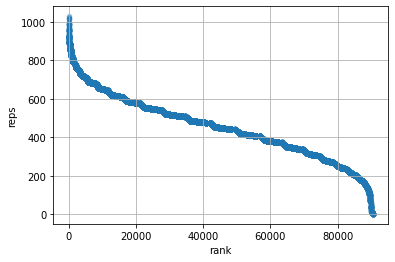

In [67]:
Event2.plot.scatter(x = 'rank', y = 'reps', grid = True,alpha = 0.3)

### Event 3 Analysis

For time:
21 deadlifts, 225 lb.

21 handstand push-ups

15 deadlifts, 225 lb.

15 handstand push-ups

9 deadlifts, 225 lb.

9 handstand push-ups

21 deadlifts, 315 lb.

50-ft. handstand walk

15 deadlifts, 315 lb.

50-ft. handstand walk

9 deadlifts, 315 lb.

50-ft. handstand walk

Time cap: 9 min.

In [68]:
Event3 = DF_MenScore[(DF_MenScore['ordinal'] == 3) & (DF_MenScore['scaled'] == 0)] 

In [69]:
Event3.sort_values(by = ['rank']).head(5).transpose()

,1402,602,7,937,277
competitorid,10169,157139,153604,38209,300638
competitorname,Austin Malleolo,Cody Mooney,Mathew Fraser,Lucas Parker,Tola Morakinyo
gender,M,M,M,M,M
divisionid,1,1,1,1,1
age,33,26,30,30,24
height,1.65,1.83,1.7,1.73,1.83
weight,80.74,95.25,88.45,86.18,93.89
overallrank,294,123,2,193,57
affiliate,CrossFit ONE Nation,CrossFit Solace,CrossFit Mayhem,CrossFit Colosseum,CrossFit Invictus Back Bay
breakdown,165 reps,165 reps,165 reps,165 reps,165 reps


In [76]:
def get_reps_event3(Breakdown):
    if Breakdown != '165 reps':
    
        List = Breakdown.split('\n')
        if ('Tiebreak' in List[-1]) or ('' in List[-1]):
            List.pop(-1)
            
        HW = 0
        Reps = 0
        for Bk in List:
            if 'handstand walk' in Bk:
                M = int(Bk.split('-')[0])
                HW += M
            else:
                Rep = int(Bk.split(' ')[0])
                Reps += Rep
        Reps = Reps + (HW//50)*10
        
    else:
        Reps = int(Breakdown.split(' ')[0])
    return Reps

In [78]:
Event3['reps_fun'] = Event3['breakdown'].dropna().apply(get_reps_event3)

In [79]:
Event3['reps_fun'].describe()

count    45792.00000
mean        80.36478
std         33.05591
min          1.00000
25%         59.00000
50%         86.00000
75%        103.00000
max        165.00000
Name: reps_fun, dtype: float64

<AxesSubplot:xlabel='rank', ylabel='reps_fun'>

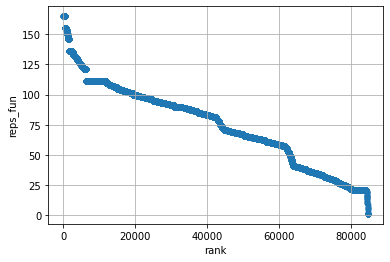

In [80]:
Event3.plot.scatter(x = 'rank', y = 'reps_fun', grid = True)

Graph shows only the competitors how finished the WOD

<AxesSubplot:ylabel='age'>

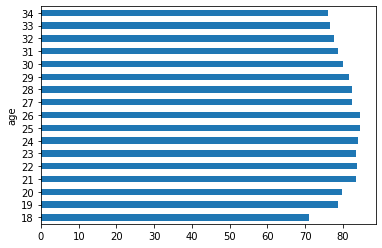

In [84]:
Event3[['age','reps_fun']].groupby(by = 'age').mean().plot(kind = 'barh', legend = False)

<AxesSubplot:xlabel='rank', ylabel='time'>

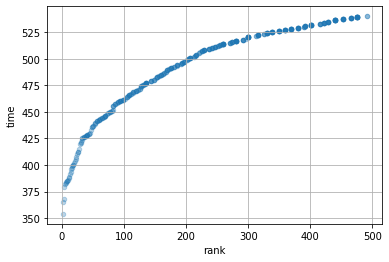

In [81]:
Event3[Event3['breakdown'] == '165 reps'].plot.scatter(x = 'rank', y = 'time', grid = True, alpha = 0.3)

Time for those who finished in the time cap.

### Event 4 Analysis

For time:
30 box jumps, 24 in.

15 clean and jerks, 95 lb.

30 box jumps, 24 in.

15 clean and jerks, 135 lb.

30 box jumps, 24 in.

10 clean and jerks, 185 lb.

30 single-leg squats

10 clean and jerks, 225 lb.

30 single-leg squats

5 clean and jerks, 275 lb.

30 single-leg squats

5 clean and jerks, 315 lb.

Time cap: 20 minutes

In [87]:
Event4 = DF_MenScore[(DF_MenScore['ordinal'] == 4) & (DF_MenScore['scaled'] == 0)] 

In [88]:
Event4.sort_values(by = ['rank']).head()

,competitorid,competitorname,gender,divisionid,age,height,weight,overallrank,affiliate,breakdown,division,is_scaled,judge,ordinal,rank,scaled,score,scoredisplay,scoreidentifier,time
23,469656,Jeffrey Adler,M,1,26,1.75,89.36,5,CrossFit Wonderland,240 reps,Men,0,Caroline Lambray,4,1,0,1002400439,12:41,7f690be6455d28112cd2,761.0
8,153604,Mathew Fraser,M,1,30,1.70,88.45,2,CrossFit Mayhem,240 reps,Men,0,Tasia Percevecz,4,2,0,1002400338,14:22,1a4a7d8760e72bb12d68,862.0
278,300638,Tola Morakinyo,M,1,24,1.83,93.89,57,CrossFit Invictus Back Bay,240 reps,Men,0,Kelsey Kiel,4,3,0,1002400330,14:30,7a4cc0ec8bc5b264968b,870.0
13,514502,Lefteris Theofanidis,M,1,30,1.71,81.00,3,NaN,240 reps,Men,0,NaN,4,4,0,1002400300,15:00,d49e55a2af5840740071,900.0
163,34796,Scott Panchik,M,1,32,1.75,84.82,33,CrossFit Mentality,240 reps,Men,0,Christin Panchik,4,5,0,1002400285,15:15,a169539763361aaebd77,915.0


In [89]:
def get_reps_event4(Breakdown):
    if Breakdown != '240 reps':  
        List = Breakdown.split('\n')
        if ('Tiebreak' in List[-1]) or ('' in List[-1]):
            List.pop(-1)
            
        Reps = 0
        for Bk in List:
                Rep = int(Bk.split(' ')[0])
                Reps += Rep        
    else:
        Reps = int(Breakdown.split(' ')[0])
    return Reps

In [92]:
Event4['reps_fun'] = Event4['breakdown'].dropna().apply(get_reps_event4)

<AxesSubplot:xlabel='rank', ylabel='reps_fun'>

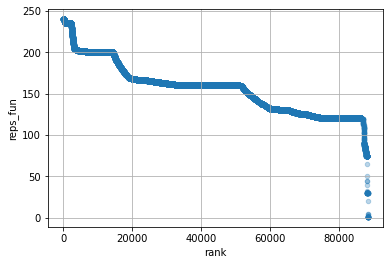

In [93]:
Event4.plot.scatter(x = 'rank', y = 'reps_fun', grid = True, alpha = 0.3)

<AxesSubplot:ylabel='age'>

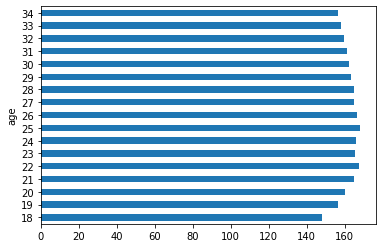

In [99]:
Event4[['age','reps_fun']].groupby(by = 'age').mean().plot(kind = 'barh', legend = False)

<AxesSubplot:xlabel='rank', ylabel='time'>

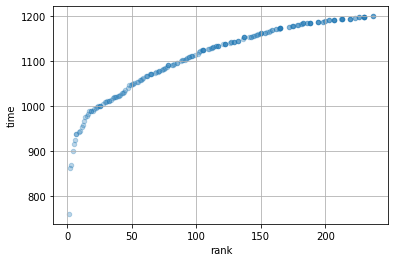

In [94]:
Event4[Event4['breakdown'] == '240 reps'].plot.scatter(x = 'rank', y = 'time', grid = True, alpha = 0.3)

Time for those who finished inside the time cap.

### Event 5 Analysis

For time, partitioned any way:

40 muscle-ups

80-cal. row

120 wall-ball shots, 20-lb. ball to 10 ft.

Time cap: 20 min.

In [101]:
Event5 = DF_MenScore[(DF_MenScore['ordinal'] == 5) & (DF_MenScore['scaled'] == 0)] 

In [103]:
Event5.sort_values(by = ['rank']).head().transpose()

,1699,4,19,49,184
competitorid,1059467,158264,81616,975774,1718365
competitorname,Lazar Đukić,Patrick Vellner,Björgvin Karl Guðmundsson,Roman Khrennikov,Cole Greashaber
gender,M,M,M,M,M
divisionid,1,1,1,1,1
age,24,30,27,25,20
height,1.83,1.8,1.78,1.82,1.83
weight,90.0,88.45,83.91,95.0,90.72
overallrank,360,1,4,10,37
affiliate,NaN,CrossFit New England,Simmagym CrossFit,NaN,CrossFit Lee's Summit (LS)
breakdown,240 reps,240 reps,240 reps,240 reps,240 reps


In [106]:
def get_reps_event5(Breakdown):
    if Breakdown != '240 reps':  
        List = Breakdown.split('\n')
        if ('Tiebreak' in List[-1]) or ('' in List[-1]):
            List.pop(-1)
            
        Reps = 0
        for Bk in List:
            if 'cal' in Bk:
                Rep = int(Bk.split('-')[0])
                Reps += Rep
            else:
                Rep = int(Bk.split(' ')[0])
                Reps += Rep        
    else:
        Reps = int(Breakdown.split(' ')[0])
    return Reps

In [107]:
Event5['reps_fun'] = Event5['breakdown'].dropna().apply(get_reps_event5)

<AxesSubplot:xlabel='rank', ylabel='reps_fun'>

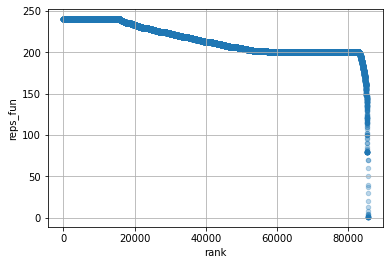

In [108]:
Event5.plot.scatter(x = 'rank', y = 'reps_fun', grid = True, alpha = 0.3)

<AxesSubplot:ylabel='age'>

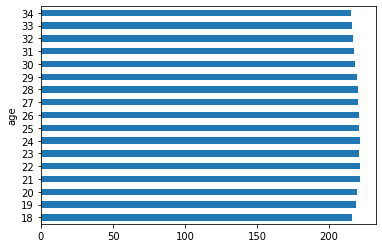

In [111]:
Event5[['age','reps_fun']].groupby(by = 'age').mean().plot(kind = 'barh', legend = False)

<AxesSubplot:xlabel='rank', ylabel='time'>

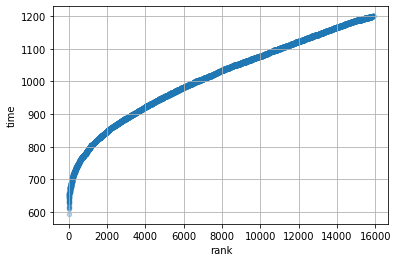

In [305]:
Event5[Event5['breakdown'] == '240 reps'].plot.scatter(x = 'rank', y = 'time', grid = True, alpha = 0.3)

Time for those who finished inside the time cap.